In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [2]:
import torch
from torch.autograd import Variable
import torch.utils.data as Data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/IntroDeepLearning_202102/main/datos/MLP_regresion.csv')
x = data['X']
y = data['Y']

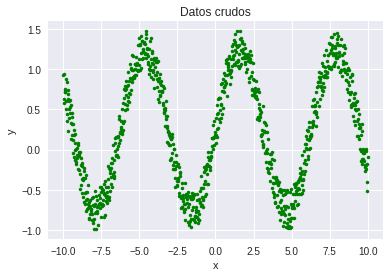

In [5]:
plt.title('Datos crudos')
plt.plot(x,y,'.g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# Tensores
X = Variable(torch.from_numpy(x.to_numpy())).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y.to_numpy())).float()
Y = torch.unsqueeze(Y,dim=1)

## Modelo 1

Epoch: [1/1], loss: 0.6394416689872742


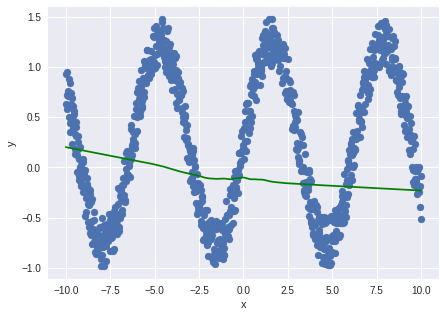

Epoch: [1/5000], loss: 0.05216149985790253


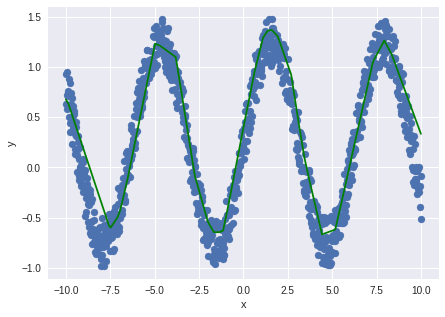

In [29]:
# Crecion del modelo 1

loses1=[]
input_dim = 1
model_1 =torch.nn.Sequential(
    torch.nn.Linear(input_dim,15),
    torch.nn.ReLU(),
    torch.nn.Linear(15,20),
    torch.nn.ReLU(),
    torch.nn.Linear(20,15),
    torch.nn.ReLU(),
    torch.nn.Linear(15,input_dim)
)
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.05)
criterion_1 = torch.nn.MSELoss()
n_epoch = 5000
loss_l1 = []

for epoch in range(n_epoch):
  
  Y_pred_1 = model_1(X)

  loss = criterion_1(Y_pred_1,Y)
  loss_l1.append(loss.item())

  optimizer_1.zero_grad()
  loss.backward()
  optimizer_1.step()

  loses1.append(loss.item())
  q=n_epoch/3

  if epoch%q==0 or epoch==n_epoch-1:
    print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
    fig = plt.figure(figsize=(7,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(), Y_pred_1.data.numpy(), 'g-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()  

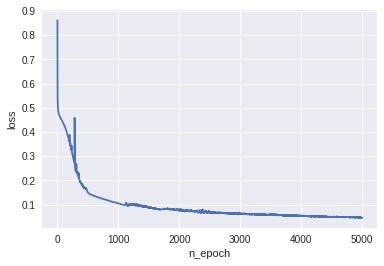

In [28]:
plt.plot(loses1)
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.show()

## Modelo 2

In [24]:
def model2(neurons,n_plots,n_epoch1):
  neus=[]
  loses=[]
  for neu in neurons:

    input_dim = 1
    model_1 =torch.nn.Sequential(
        torch.nn.Linear(input_dim,neu),
        torch.nn.Sigmoid(),
        torch.nn.Linear(neu,input_dim)
        #torch.nn.Softmax(dim=1)
    )
    optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.05)
    criterion_1 = torch.nn.MSELoss()
    n_epoch = n_epoch1
    loss_l1 = []

    for epoch in range(n_epoch):
      
      Y_pred_1 = model_1(X)

      loss = criterion_1(Y_pred_1,Y)
      loss_l1.append(loss.item())

      optimizer_1.zero_grad()
      loss.backward()
      optimizer_1.step()

      loses.append(loss.item())
      q=n_epoch/n_plots

      if epoch%q==0 or epoch==n_epoch-1:
        print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
        fig = plt.figure(figsize=(7,5))
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), Y_pred_1.data.numpy(), 'g-')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
  return loses
      

In [ ]:
l1 = model2()

In [ ]:
model

## Descripción


### Modelo incial
Para el modelo incial se empleo el modelo base para tener una de idea de como abordar el problema, este cuenta con dos capas 

### Modelo 1


### Modelo 2
Para el modeo 2 se decidio realizar cambio en la función de activación 



<img src="https://pytorch.org/docs/stable/_images/ReLU.png" alt="drawing" width="500"/>
<img src="https://pytorch.org/docs/stable/_images/Sigmoid.png" alt="drawing" width="500"/>

Como se puede observa la función de activación *Relu*, es más cortante miestras que *Sigmoid*, lo que va más de acuerdo a la función que se quiere modelar 

